In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import os
from glob import glob
from PIL import Image
from collections import Counter
import numpy as np

In [8]:
# Function to load images from a folder and its subfolders
def load_images_from_folder(folder):
    images = []
    labels = []
    for subdir, _, files in os.walk(folder):
    
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                labels.append(subdir.split('/')[1])
                img_path = os.path.join(subdir, file)
                img = Image.open(img_path)
                images.append(img)
    return images,labels

# Specify the main folder containing subfolders with images
main_folder = 'data'

# Load images
images,labels = load_images_from_folder(main_folder)

# Print the number of images loaded
print(f'Loaded {len(images)} images.')

Loaded 1653 images.


In [9]:
Counter(labels)

Counter({'0Normal': 517,
         '1Doubtful': 477,
         '2Mild': 232,
         '3Moderate': 221,
         '4Severe': 206})

In [6]:
from PIL import Image
import os

# Folder containing the images
input_folder = '/Users/advait/Desktop/Knee_Arthiritis_AI/data'
output_folder = '/Users/advait/Desktop/Knee_Arthiritis_AI/data'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Iterate through all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
        img_path = os.path.join(input_folder, filename)
        with Image.open(img_path) as img:
            # Resize the image
            resized_img = img.resize((300, 162))
            
            # Save the resized image to the output folder
            output_path = os.path.join(output_folder, filename)
            resized_img.save(output_path)

print("All images have been resized.")

All images have been resized.


In [104]:
images[0].size

(300, 162)

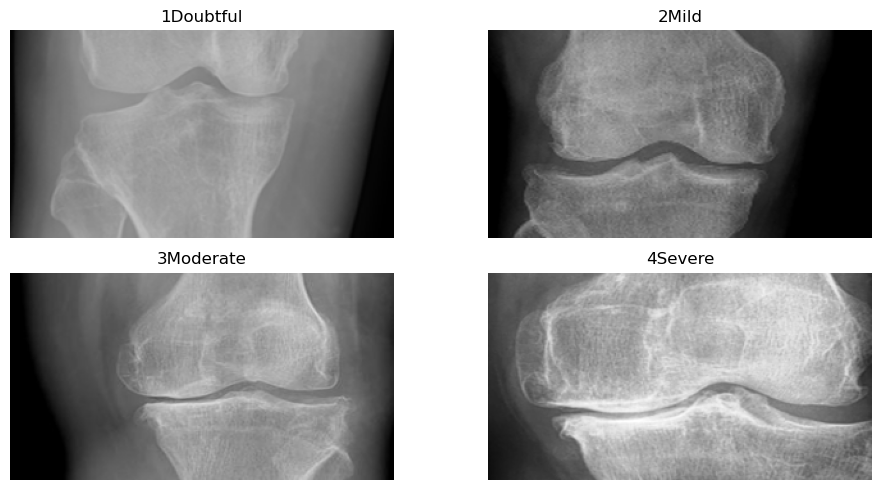

<Figure size 640x480 with 0 Axes>

In [111]:
# Define the path to the dataset
dataset_path = '/Users/advait/Desktop/Knee_Arthiritis_AI/data'

# Define the categories
categories = ['1Doubtful', '2Mild', '3Moderate', '4Severe']

# Initialize a figure with a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the categories and axes
for ax, category in zip(axes, categories):
    # Get the path of the first image in the folder
    image_path = glob(os.path.join(dataset_path, category, '*.png'))[0]
    
    # Open the image
    image = Image.open(image_path)
    
    # Plot the image
    ax.imshow(image, cmap='gray')
    ax.set_title(category)
    ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
plt.savefig('kneeimages.pdf')

In [8]:
images

NameError: name 'images' is not defined

In [141]:
X = []
for image in images:
    image = np.transpose(np.array(image), (1,0,2))
    X.append(image)

ValueError: axes don't match array

In [143]:
X[0].shape

(300, 162, 3)

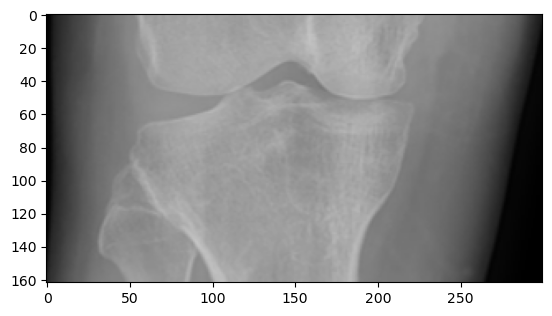

In [131]:
plt.imshow(X[0])

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import cv2
import os

def load_and_preprocess_images(folder, img_size=(128, 128)):
    images = []
    labels = []
    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        for filename in os.listdir(class_folder):
            img = cv2.imread(os.path.join(class_folder, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)  # Resize to a fixed size
                images.append(img)
                labels.append(class_name)
    images = np.array(images) / 255.0  # Normalize pixel values to [0, 1]
    images = images.reshape(images.shape[0], img_size[0], img_size[1], 1)  # Reshape for the CNN
    return np.array(images), np.array(labels)

X, y = load_and_preprocess_images('/Users/advait/Desktop/Knee_Arthiritis_AI/data')


lb = LabelBinarizer()
y = lb.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ModuleNotFoundError: No module named 'tensorflow'